In [2]:
#!/usr/bin/python3.8
# coding=utf-8
import pandas as pd
import geopandas
import matplotlib.pyplot as plt
import contextily
import sklearn.cluster
import numpy as np
# muzeze pridat vlastni knihovny

In [3]:
df = pd.read_pickle("../2/accidents.pkl.gz")

In [8]:
def make_geo(df: pd.DataFrame) -> geopandas.GeoDataFrame:
    """ Konvertovani dataframe do geopandas.GeoDataFrame se spravnym kodovani"""
    # TODO: filter nans
    gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df['d'], df['e']), crs='EPSG:5514')
    return gdf

In [9]:
gdf = make_geo(df)

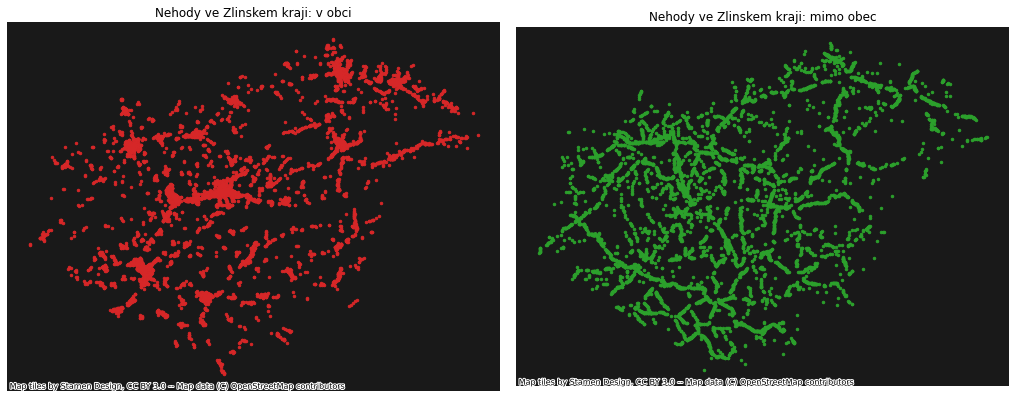

In [10]:
fig, ax = plt.subplots(1,2, constrained_layout=True, figsize=(14,8))
ax[0].axis("off")
ax[1].axis("off")
gdf_zlk = gdf[gdf["region"] == "ZLK"]
gdf_zlk[gdf_zlk["p5a"] == 1].plot(ax=ax[0], markersize=6, color="tab:red", label="Nehody v obci")
gdf_zlk[gdf_zlk["p5a"] == 2].plot(ax=ax[1], markersize=6, color="tab:green", label="Nehody mimo obec")
ax[0].set_title('Nehody ve Zlinskem kraji: v obci')
ax[1].set_title('Nehody ve Zlinskem kraji: mimo obec')
contextily.add_basemap(ax[0], crs=gdf_zlk.crs.to_string(), source=contextily.providers.Stamen.Toner, alpha=0.9)
contextily.add_basemap(ax[1], crs=gdf_zlk.crs.to_string(), source=contextily.providers.Stamen.Toner, alpha=0.9)

In [18]:
gdf

p1 p36   p37         p2a weekday(p2a)   p2b p6  p7  p8  p9  \
0       002100160001   4        2016-01-01            5  0055  1   1   0   2   
1       002100160002   4        2016-01-01            5  0130  1   3   0   2   
2       002100160003   5        2016-01-01            5  0100  1   2   0   2   
3       002100160004   6        2016-01-01            5  0120  9   0   0   2   
4       002100160005   6        2016-01-01            5  2560  2   0   0   2   
...              ...  ..   ...         ...          ...   ... ..  ..  ..  ..   
487156  190906200498   6        2020-09-29            2  2560  2   0   0   2   
487157  190906200499   0     6  2020-09-29            2  1940  1   2   0   2   
487158  190906200500   3  2114  2020-09-30            3  2045  1   4   0   2   
487159  190906200501   0     6  2020-10-01            4  0420  3   0   4   2   
487160  190906200502   6        2020-10-01            4  2560  2   0   0   2   

        ...        n  o                       p       q       r       s  \
0       ...   711403     Souhlasnýsesměremúseku  Pomalý  554782  451622   
1       ...                                                               
2       ...                                                               
3       ...                                                               
4       ...                                                               
...     ...      ... ..                     ...     ...     ...     ...   
487156  ...  3438492     Souhlasnýsesměremúseku  Pomalý  560294           
487157  ...  1671277     Souhlasnýsesměremúseku  Pomalý  560286           
487158  ...  1669033         Opačnýkesměruúseku  Pomalý  554642           
487159  ...  3513947     Souhlasnýsesměremúseku  Pomalý  560294           
487160  ...  3704381     Souhlasnýsesměremúseku  Pomalý  560383           

                         t  p5a  region                          geometry  
0       GN_V0.1UIR-ADR_410    1     PHA  POINT (-734669.812 -1041599.250)  
1                             1     PHA  POINT (-742316.875 -1044246.000)  
2                             1     PHA  POINT (-742980.312 -1042534.625)  
3                             1     PHA  POINT (-732366.438 -1052365.375)  
4                             1     PHA  POINT (-740779.625 -1042869.625)  
...                    ...  ...     ...                               ...  
487156  GN_V0.1UIR-ADR_410    1     KVK  POINT (-867674.188 -1017530.875)  
487157  GN_V0.1UIR-ADR_410    2     KVK  POINT (-863918.062 -1014349.500)  
487158  GN_V0.1UIR-ADR_410    2     KVK  POINT (-868128.125 -1038237.125)  
487159  GN_V0.1UIR-ADR_410    2     KVK  POINT (-868676.312 -1017710.500)  
487160  GN_V0.1UIR-ADR_410    1     KVK  POINT (-858744.250 -1008824.125)  

[487161 rows x 66 columns]

In [13]:
def plot_geo(gdf: geopandas.GeoDataFrame, constrained_layout=True, fig_location: str = None,
             show_figure: bool = False):
    """ Vykresleni grafu s dvemi podgrafy podle lokality nehody """
    # do not show plot immediately
    plt.ioff()
    # plot two subplots side by side
    fig, ax = plt.subplots(1,2, constrained_layout=constrained_layout, figsize=(14,8))
    # do not plot axises
    ax[0].axis("off")
    ax[1].axis("off")
    # select only ZLK region
    gdf_zlk = gdf[gdf["region"] == "ZLK"]
    # convert projection
    gdf_mer = gdf_zlk.to_crs(epsg=3857)
    # plot accidents
    gdf_mer[gdf_mer["p5a"] == 1].plot(ax=ax[0], markersize=6, color="tab:red", label="Nehody v obci")
    gdf_mer[gdf_mer["p5a"] == 2].plot(ax=ax[1], markersize=6, color="tab:green", label="Nehody mimo obec")
    # set titles
    ax[0].set_title('Nehody ve Zlinskem kraji: v obci')
    ax[1].set_title('Nehody ve Zlinskem kraji: mimo obec')
    # set map
    contextily.add_basemap(ax[0], crs=gdf_mer.crs.to_string(), source=contextily.providers.Stamen.Toner, alpha=0.9)
    contextily.add_basemap(ax[1], crs=gdf_mer.crs.to_string(), source=contextily.providers.Stamen.Toner, alpha=0.9)
    # save figure to fig_location
    plt.savefig(fig_location)
    # show plot
    if show_figure:
        plt.show()

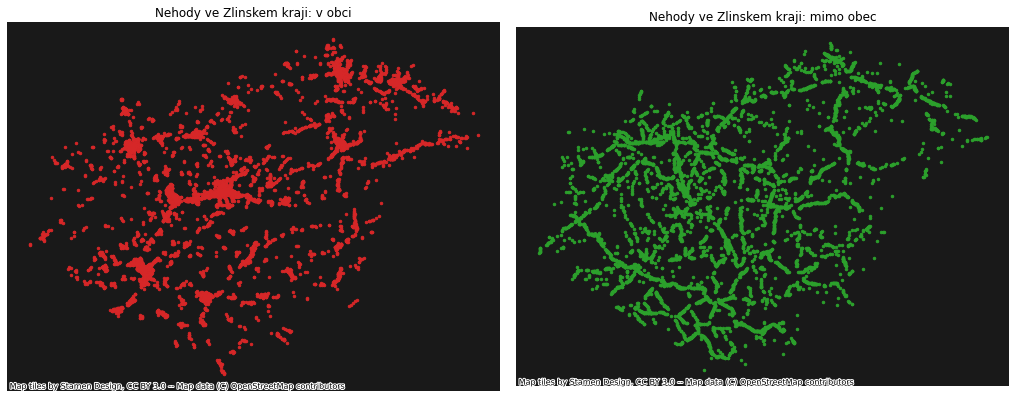

In [15]:
plot_geo(gdf, True, 'zlk_plot.pdf', True)

In [ ]:
def plot_cluster(gdf: geopandas.GeoDataFrame, fig_location: str = None,
                 show_figure: bool = False):
    """ Vykresleni grafu s lokalitou vsech nehod v kraji shlukovanych do clusteru """